In [43]:
import numpy as np
import matplotlib.pyplot as plt

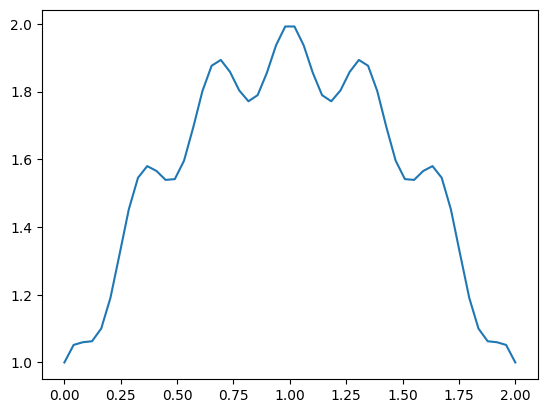

In [44]:

f = lambda x: -(0.1 + (1-x)**2 - 0.1*np.cos(6*np.pi*(1-x))) + 2


x = np.linspace(0, 2, 50)
y = f(x)

plt.plot(x, y)



In [45]:
# FUNCION PARA INICIAR POBLACION
def iniciar_población(numero_individuos, longitud_cromosoma):
    return  np.random.randint(0,2,size=(numero_individuos,longitud_cromosoma))

In [46]:
# FUNCIÓN PARA DECODIFICAR DE BINARIO A DECIMAL LOS INDIVIDUOS
def decodificar(poblacion, min, max):
    [renglones,columnas] = poblacion.shape
    decimal = np.zeros(renglones)
    decimal_rescalado = np.zeros(renglones)
    
    for i in range(renglones):
        for j in range(columnas):
            # Se transforma de binario a decimal entero
            decimal[i] += poblacion[i,j]*2**(columnas-j-1)
            
            # Se rescalan los valores al rango de busqueda
            decimal_rescalado[i] = (max-min)*decimal[i]/(2**columnas-1) + min
            
    return decimal_rescalado



In [47]:
# FUNCIÓN PARA OBTENER LAS APTITUDES (FITNESS) DE CADA INDIVIDUO

def fitness(poblacion, min, max):
    [renglones,columnas] = poblacion.shape
    x = decodificar(poblacion,min,max)
    fitness = -(0.1 + (1-x)**2 - 0.1*np.cos(6*np.pi*(1-x))) + 2
    return fitness

In [48]:
# FUNCIÓN DE CRUZAMIENTO (SINGLE POINT)
def cruzamiento(poblacion,pares_de_cromosomas):
    [renglones,columnas] = poblacion.shape
    if pares_de_cromosomas > renglones/2:
        raise ValueError("El numero de pares de cromosomas debe ser menor a la mitad del numero de individuos")
    M = np.zeros((2*pares_de_cromosomas,columnas)) # Matriz de hijos
    for i in range(pares_de_cromosomas):
        r1 = np.random.randint(0,renglones,size=(1,2)) # Par de numeros aleatorios para seleccionar padres
        r2 = np.random.randint(0,columnas) # Punto de cruzamiento
        
        # Selecionamos los padres a cruzar

        
        padre_1 = poblacion[r1[0,0],:]
        padre_2 = poblacion[r1[0,1],:]
        
        # Se crean los hijos
        hijo_1 = np.concatenate((padre_1[0:r2], padre_2[r2:]))
        hijo_2 = np.concatenate((padre_2[0:r2], padre_1[r2:]))
        
        # Guardar a mis hijos
        M[2*i,:] = hijo_1
        M[2*i+1,:] = hijo_2
    return M


        
        

In [49]:
P = iniciar_población(10,8)
print(P)

cruza = cruzamiento(P,5)
print(cruza.shape)
print(cruza)

[[0 1 1 1 1 1 0 0]
 [1 1 1 0 1 1 0 0]
 [1 1 0 0 1 0 1 0]
 [0 1 0 1 0 1 1 1]
 [1 1 0 0 0 0 0 1]
 [0 0 0 0 0 1 1 1]
 [0 1 0 0 0 0 0 0]
 [0 1 1 0 1 1 1 0]
 [1 0 0 1 1 0 1 1]
 [1 0 0 0 0 0 1 0]]
(10, 8)
[[0. 1. 0. 0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 1. 0. 0.]
 [1. 0. 0. 1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]]
